In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Word Cloud Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

pd.set_option('display.max_colwidth', None)


In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

# 3. Visual exploration of textual data

In [5]:
# Filter the data randomly and keep 10000 rows
df = df.sample(n=10000, random_state=42)


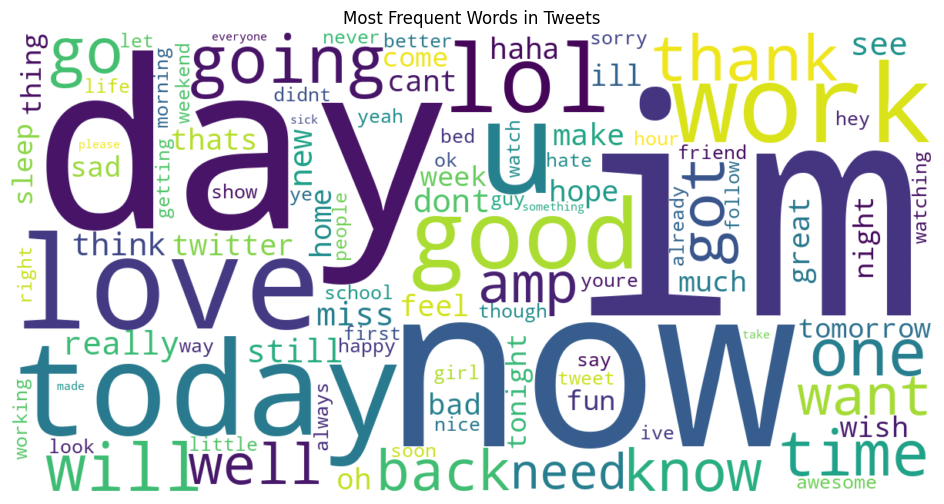

In [16]:
# Combine all tweets into one text
all_text = ' '.join(df['text'].astype(str))

# Clean text - remove URLs, mentions, special chars
all_text = re.sub(r'http\S+|@\S+|[^\w\s]', '', all_text.lower())

# Create word cloud
wordcloud = WordCloud(width=1200, height=600, 
                     background_color='white',
                     max_words=100).generate(all_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets')
plt.show()


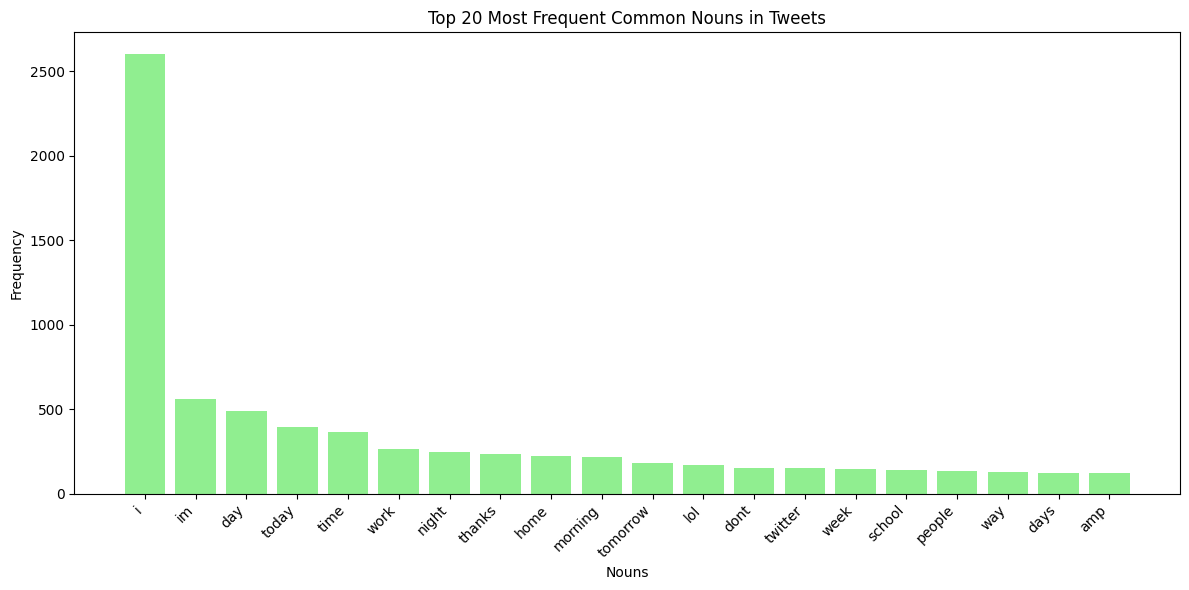

In [19]:
# Tokenize the cleaned text
tokens = word_tokenize(all_text)

# Tag tokens with part of speech
tagged_tokens = pos_tag(tokens)

# Filter for common nouns (NN, NNS)
common_nouns = [word for word, pos in tagged_tokens if pos in ('NN', 'NNS')]

# Count noun frequencies
noun_counts = Counter(common_nouns)

# Get the 20 most common nouns and their counts
common_nouns = noun_counts.most_common(20)
nouns, noun_counts = zip(*common_nouns)

# Plot the bar chart for common nouns
plt.figure(figsize=(12, 6))
plt.bar(nouns, noun_counts, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Common Nouns in Tweets')
plt.xlabel('Nouns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


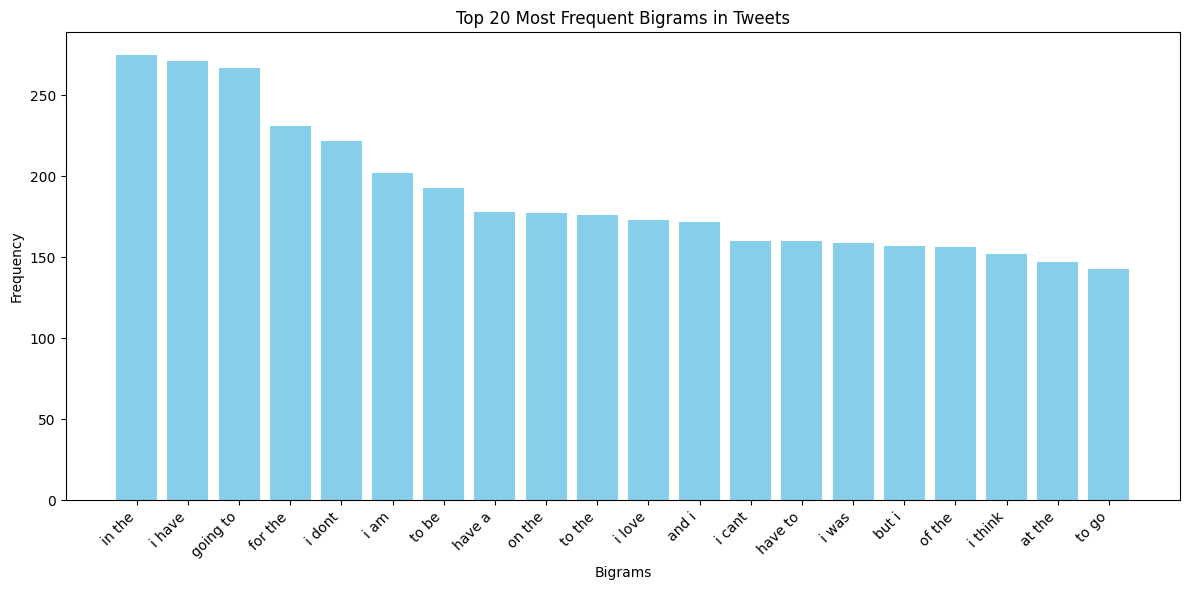

In [20]:

# Create a bigram frequency distribution
bigrams = list(nltk.bigrams(tokens))
bigram_counts = Counter(bigrams)

# Get the 20 most common bigrams and their counts
common_bigrams = bigram_counts.most_common(20)
bigrams, bigram_counts = zip(*common_bigrams)

# Convert bigrams to a more readable format
bigrams = [' '.join(bigram) for bigram in bigrams]

# Plot the bar chart for common bigrams
plt.figure(figsize=(12, 6))
plt.bar(bigrams, bigram_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Bigrams in Tweets')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



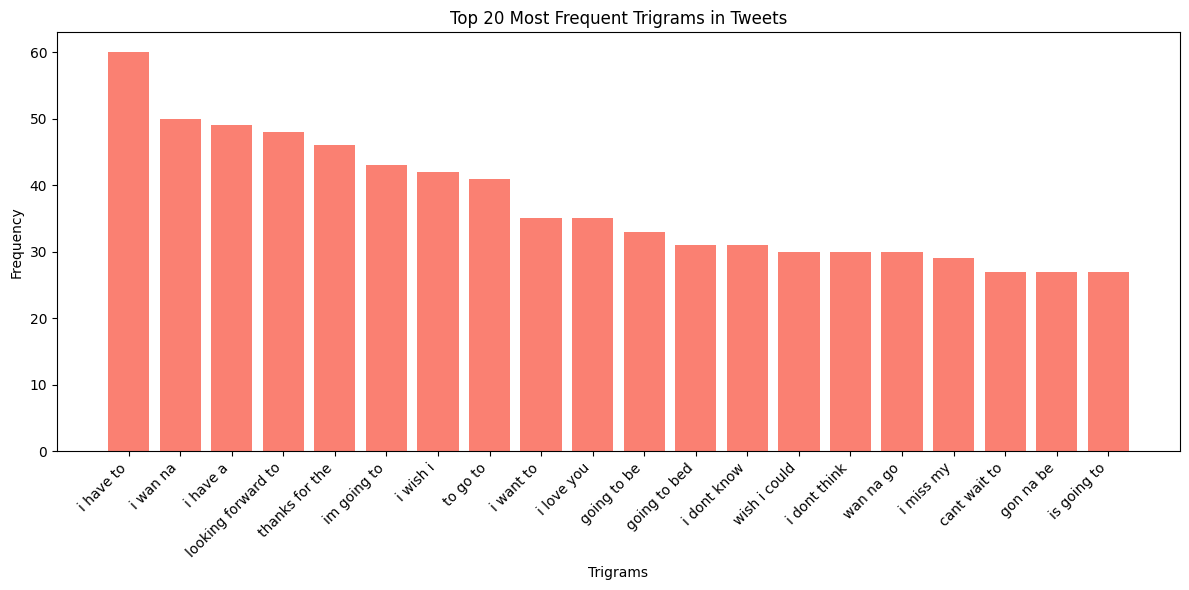

In [21]:
# Create a trigram frequency distribution
trigrams = list(nltk.trigrams(tokens))
trigram_counts = Counter(trigrams)

# Get the 20 most common trigrams and their counts
common_trigrams = trigram_counts.most_common(20)
trigrams, trigram_counts = zip(*common_trigrams)

# Convert trigrams to a more readable format
trigrams = [' '.join(trigram) for trigram in trigrams]

# Plot the bar chart for common trigrams
plt.figure(figsize=(12, 6))
plt.bar(trigrams, trigram_counts, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Trigrams in Tweets')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
